In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from functools import reduce
from sklearn import preprocessing
import requests
from bs4 import BeautifulSoup

import datetime
import yfinance as yf
import time
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from datetime import date


In [3]:
# recessions datetime variable (boolean: if recession then True)

start_date = '2003-01-02'
end_date = '2023-01-27'

# Create the date range
date_range = pd.date_range(start=start_date, end=end_date)

# Convert the date range to a pandas series
s = pd.Series(data=date_range, name='Date')

# Convert Series to DataFrame
recessions_df = s.to_frame()

# list with recessions' start and end date [if index is even: start date; if index is odd: end date]
recession_dates = pd.to_datetime(['2007-12-01','2009-06-01','2020-02-01', '2020-04-01'])

# Create list of boolean variables (True if in recession)
recessions = [True if i > recession_dates[0] and i <= recession_dates[1] or i > recession_dates[2] and i <= recession_dates[3]   else False for i in recessions_df['Date']] 

# Add column to DataFrame
recessions_df['Recession'] = recessions

# Rename Date to DATE to make mergin easier
recessions_df.rename(columns={'Date': 'DATE'}, inplace=True)

recessions_df['DATE'] =  pd.to_datetime(recessions_df['DATE'], utc=True)


# print start of 1973 recession
print(recessions_df.loc[recessions_df['DATE']> '2007-11-29'].head())

                          DATE  Recession
1793 2007-11-30 00:00:00+00:00      False
1794 2007-12-01 00:00:00+00:00      False
1795 2007-12-02 00:00:00+00:00       True
1796 2007-12-03 00:00:00+00:00       True
1797 2007-12-04 00:00:00+00:00       True


In [4]:
expected_interest = pd.read_csv("T5YIFR.csv") #daily
interest_rate = pd.read_csv("data/DFF.csv") #daily

interest_rate['DATE'] = pd.to_datetime(interest_rate['DATE'], utc=True)
expected_interest['DATE'] = pd.to_datetime(expected_interest['DATE'], utc=True)

interest_rate = interest_rate.loc[interest_rate['DATE']>"2003-01-03"].set_index('DATE')
expected_interest = expected_interest.set_index('DATE')


interest_rate = interest_rate.replace(".", np.nan)
expected_interest = expected_interest.replace(".", np.nan)

expected_interest['T5YIFR'] = pd.to_numeric(expected_interest['T5YIFR'])

print(expected_interest.info())
print(interest_rate.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5242 entries, 2003-01-02 00:00:00+00:00 to 2023-02-03 00:00:00+00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T5YIFR  5027 non-null   float64
dtypes: float64(1)
memory usage: 81.9 KB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7329 entries, 2003-01-04 00:00:00+00:00 to 2023-01-27 00:00:00+00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DFF     7329 non-null   float64
dtypes: float64(1)
memory usage: 114.5 KB
None


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


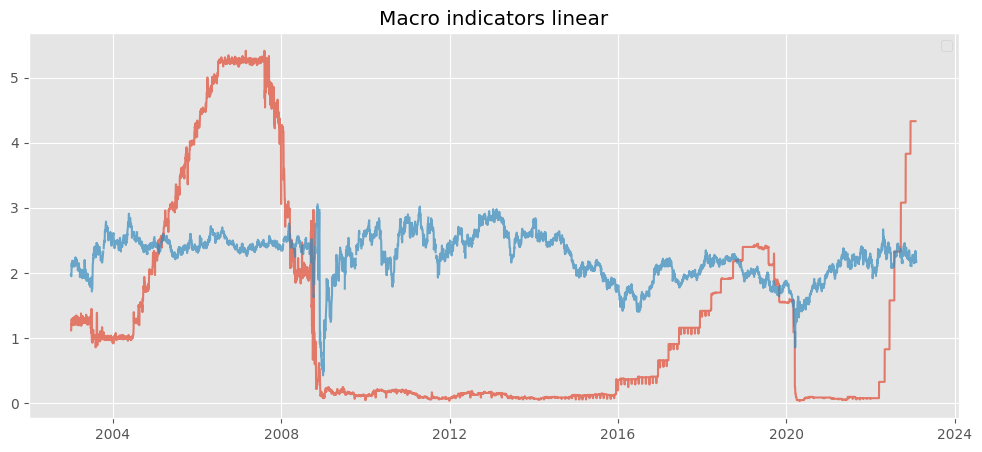

In [5]:

plt.style.use('ggplot')


plt.figure(figsize=[12, 5])
plt.plot(interest_rate['DFF'], alpha = 0.7)
plt.plot(expected_interest['T5YIFR'], alpha = 0.7)

plt.legend()
plt.title(f"Macro indicators linear")


#  for i in range(0, len(recession_dates), 2):
 #   ax.axvspan(recession_dates[i], recession_dates[i+1], alpha=0.2, color='green')

plt.show()